In [11]:
contents = ["大巨蛋案對市府同仁下封口令？柯P否認", "柯P市府近來飽受大巨蛋爭議"]

In [19]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
for sentence in contents:
    #print(list(jieba.cut(sentence)))
    corpus.append(' '.join(jieba.cut(sentence)))

In [20]:
corpus

['大巨蛋 案對 市府 同仁 下 封口令 ？ 柯P 否認', '柯P 市府 近來 飽受 大巨蛋 爭議']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
X

<2x10 sparse matrix of type '<class 'numpy.longlong'>'
	with 13 stored elements in Compressed Sparse Row format>

In [25]:
print(vectorizer.get_feature_names())

['同仁', '否認', '大巨蛋', '封口令', '市府', '柯p', '案對', '爭議', '近來', '飽受']


In [24]:
X.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 1, 1]], dtype=int64)

In [26]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
cosine_similarity(X)

array([[1.        , 0.46291005],
       [0.46291005, 1.        ]])

In [27]:
cosine_distances(X)

array([[0.        , 0.53708995],
       [0.53708995, 0.        ]])

## 根據新聞相似度推薦新聞

In [30]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20171214news.xlsx', index_col = 0)

In [36]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
titles = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec.get('content'))))
    titles.append(rec.get('title'))

In [38]:
#corpus[0]
titles[0]

'【更新】水利會改官派明闖關\u3000綠委24小時前顧議場大門防藍突襲'

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [41]:
X

<899x28957 sparse matrix of type '<class 'numpy.longlong'>'
	with 122298 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)
cs.shape

(899, 899)

In [46]:
titles[12]

'黃國昌：長期目標要消滅國民黨\u3000不支持柯文哲的兩岸一家親'

In [48]:
cs[12].shape

(899,)

In [52]:
import numpy 
students = [60,30,40,70,90,80,]
students_ary = numpy.array(students)
students_ary.argsort()

array([1, 2, 0, 3, 5, 4])

In [56]:
for idx in cs[12].argsort()[0:10]:
    print(titles[idx], cs[12][idx])

黃國昌：長期目標要消滅國民黨　不支持柯文哲的兩岸一家親 0.0
黃國昌若被罷免會更強　他：成為選輸北市的阿扁 0.5542565596535691
罷免案將投票　李遠哲今再度現身力挺黃國昌 0.5752596978859429
「兩蔣時代」超譯　網友：不准傷皇城內的和氣！ 0.5938835126582123
罷昌案周六投票　時代力量全力澄清不實謠言 0.6402804718905146
【聲援片】沈發惠呼籲罷昌案投「不同意」　黃國昌：謝謝您 0.7003246342755608
宗教團體可曾想過：黃國昌犀利形象恐越打越旺 0.7749027801375493
【歷史上的今天】幫黃國昌站台　蔡英文：我有準備當總統了 0.7803630780883579
【更新】水利會改官派明闖關　綠委24小時前顧議場大門防藍突襲 0.7869878365124581
臉書在台灣繳稅太少　財政部將進一步追稅 0.7926505336912069


In [58]:
pos = 12
print('查詢文章:',titles[pos])
for idx in cs[pos].argsort()[1:10]:
    if cs[pos][idx] < 0.7:
        print('相關文章',titles[idx], cs[pos][idx])

查詢文章: 黃國昌：長期目標要消滅國民黨　不支持柯文哲的兩岸一家親
相關文章 黃國昌若被罷免會更強　他：成為選輸北市的阿扁 0.5542565596535691
相關文章 罷免案將投票　李遠哲今再度現身力挺黃國昌 0.5752596978859429
相關文章 「兩蔣時代」超譯　網友：不准傷皇城內的和氣！ 0.5938835126582123
相關文章 罷昌案周六投票　時代力量全力澄清不實謠言 0.6402804718905146


In [59]:
def getSimiliarNews(pos):
    print('查詢文章:',titles[pos])
    for idx in cs[pos].argsort()[1:10]:
        if cs[pos][idx] < 0.7:
            print('相關文章',titles[idx], cs[pos][idx])

In [65]:
getSimiliarNews(35)

查詢文章: FBI探員罵川普「白痴」　遭調離通俄門調查
相關文章 【公道難伸張】再控川普性騷　受害者：沒人在乎很受傷 0.6434278035355978
相關文章 老謝：美菲2位狂人兄弟 今年交出不錯成績單　 0.6502913209540035
相關文章 否認性騷指控　川普：民主黨編的假新聞 0.6754198672772045
相關文章 諷參議員陸天娜「為錢啥都做」　川普遭美媒批不適任總統 0.6984356814409867


In [67]:
q = '黃國昌 李遠哲'
q_list = [' '.join(jieba.cut(q))]

In [71]:
q_vec = vectorizer.transform(q_list)
q_vec

<1x28957 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [73]:
q_cs = cosine_distances(q_vec, X)

In [74]:
q_cs.shape

(1, 899)

In [79]:
q_cs.argsort()[0][0]

182

In [80]:
titles[182]

'黃國昌若被罷免會更強\u3000他：成為選輸北市的阿扁'

## 小任務(一)
- 請先寫個網路爬蟲爬取台北富邦銀行的常見問題，並將問題與答案整理名為qa的DataFrame？
- https://www.fubon.com/banking/faq/index.htm

In [83]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.fubon.com/banking/FAQ_Data//faq/index_data/faqData1.xml')
soup = BeautifulSoup(res.text, 'lxml')

In [89]:
qa_ary = []
for item in soup.select('item'):
    question = item.select_one('title').text
    answer_tmp = item.select_one('description').text
    answer = BeautifulSoup(answer_tmp, 'lxml')
    dic = {'question': question, 'answer': answer.text}
    qa_ary.append(dic)

In [90]:
import pandas
qa = pandas.DataFrame(qa_ary)
qa.head()

,answer,question
0,感謝您申辦本行信用卡，如您尚需補件，請您備妥相關資料並在文件上註明「身分證字號」、「聯絡電話...,申請信用卡有缺少資料應如何補件？
1,只要是作業系統為 Android 5.0以上且內建NFC功能的手機即可使用。為確保交易穩定性...,什麼型號的手機可支援HCE行動信用卡？
2,請確認您輸入的註冊手機門號是否有誤、是否有設定阻擋企業簡訊功能。,註冊「台灣行動支付」APP時沒有收到驗證碼，請問怎麼辦？
3,可以，但若您留存於本行的手機門號並非目前實際使用的門號，請務必致電本行客服中心更新您的手機門...,註冊「台灣行動支付」APP之手機門號可以和留存於銀行之手機門號不同嗎？
4,您可透過拍攝或手動輸入您欲下載的卡號、有效期限、卡片背面簽名欄後3碼（實體卡片需先完成開卡）...,如何將卡片新增於我的手機上？


In [91]:
len(qa)

231

## 小任務 (二)
- 試著建立一個依內容相似度回應答案的問答機器人，當使用者輸入問題時，機器人可以依相似問題給予對應答案


In [96]:
import jieba
jieba.load_userdict('/Users/davidchiu/Desktop/userdict2.txt')

### 根據 qa DataFrame建立詞頻矩陣

In [113]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
answers = []
for idx, rec in qa.iterrows():
    corpus.append(' '.join(jieba.cut(rec.get('question'))))
    answers.append(rec.get('answer'))

### 使用sklearn 的CountVectorizer 建立詞頻矩陣

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [115]:
X

<231x559 sparse matrix of type '<class 'numpy.longlong'>'
	with 1971 stored elements in Compressed Sparse Row format>

### 把使用者輸入的問題變成是詞向量

In [117]:
user_query = input('請輸入你的問題:')
user_query_list = [' '.join(jieba.cut(user_query))]

請輸入你的問題:如何計算就學貸款額度?


In [118]:
user_query_list

['如何 計算 就學 貸款 額度 ?']

In [119]:
user_query_vec = vectorizer.transform(user_query_list)

In [120]:
user_query_vec

<1x559 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

### 根據使用者輸入的問題給予最相近的答案

In [121]:
from sklearn.metrics.pairwise import cosine_distances
cs  = cosine_distances(user_query_vec, X)

In [122]:
cs.shape

(1, 231)

In [123]:
corpus[cs.argsort()[0][0]]

'就學 貸款 之 額度 如何 計算 ？'

In [124]:
answers[cs.argsort()[0][0]]

'1.學生申請就學貸款之金額，以下列各項費用為範圍：\n\n(1.)學雜費：其金額為該學期實際繳納者。【另依據教育部93 年7 月29 日台高（四）字第0930097146 號函釋：鑒於「音樂指導費」為音樂系學生應繳納費用之一，故得納入學雜費貸款金額項下。】\n(2.)實習費：其金額為該學期實際繳納者。\n(3.)書籍費：高級中等學校為每生每學期新臺幣1,000 元；專科以上學校為每生每學期新臺幣3,000 元。\n(4.)住宿費：其金額為該校住校宿舍費，校外住宿學生申貸之住宿費，以該校住校宿舍費之最高者為基準。\n(5.)學生團體保險費：其金額為該學期實際繳納者。\n(6.)海外研修費：每生每年以新臺幣44 萬元為上限。(需檢附蓋有學校戳章之「申請就學貸款海外研修費證明」)。\n(7.)生活費：低收入戶學生，每生每學期以新臺幣4 萬元為上限；中低收入戶學生，每生每學期以新臺幣2 萬元為上限。生活費貸款者，應為經直轄市、縣（市）社政主管機關核定為低收入戶或中低收入戶之學生。\n(8.)電腦及網路通訊使用費：其金額依該管主管機關之規定。\n\n2.享受全部公費之公費生或已獲得政府主辦之其他無息助學貸款者，不得申請就學貸款。但辦理學雜費減免或已請領教育部助學金之學生，得就學雜等各費減除學雜費減免或教育部助學金後之差額申請就學貸款。\n3.書籍費、校外住宿費或生活費由學校逕行發給學生。\n4.就學貸款原則採「每一教育階段學程簽訂一張總額度借據」方式辦理。每一教育階段學程總額度，係由本行依據第1 點所列7 個可申貸項目，估算每一教育階段學程所需花費之總金額而訂定（例如高中階段是估算6 個學期所需花費之金額），並一體適用於各該教育階段之申請人。\n5.借據所定借款額度如因學生在國內就學時間延長或學雜各費調漲等事由而致不敷使用者，依借據之約定，本行得於知悉該事由時，以「借款額度調整通知書」通知學生及連帶保證人調整後之額度，學生及其連帶保證人則應就實際申請撥款之合計金額負還款責任。'

In [126]:
def getAnswer(user_query):
    user_query_list = [' '.join(jieba.cut(user_query))]    
    user_query_vec = vectorizer.transform(user_query_list)
    cs  = cosine_distances(user_query_vec, X)
    return answers[cs.argsort()[0][0]]

In [128]:
user_query = input('請輸入你的問題:')
print(getAnswer(user_query))

請輸入你的問題:請問申請信用貸款會有哪些費用？
本行信用貸款僅收取帳戶管理費與匯款手續費，上述費用將於撥款時自借款金額中扣除，除此之外並無任何其他費用，撥貸前亦不會跟您收取任何費用。若您辦理信用貸款時，遭要求「先匯款」或「收取現金」者，應屬代辦公司業務招攬方式，請勿向其申辦，請直接與申辦專線0809-01-02-03聯繫申辦。


## 分群

In [131]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20150628news.xlsx', index_col = 0)

In [132]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [133]:
len(news)

147

In [134]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
titles = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec.get('description'))))
    titles.append(rec.get('title'))

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [136]:
X

<147x11150 sparse matrix of type '<class 'numpy.longlong'>'
	with 22651 stored elements in Compressed Sparse Row format>

In [137]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [141]:
cs.shape
#cs

(147, 147)

In [142]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)

In [143]:
c = km.fit_predict(cs)

In [149]:
import numpy as np
a = [80,82,70,60,85]
b = [1,1,0,0,1]
na = np.array(a)
nb = np.array(b)
na[nb == 1]

array([80, 82, 85])

In [146]:
import numpy as np
np_titles = np.array(titles)

In [155]:
np_titles[c == 3].tolist()

['希臘國內三分一自動櫃員機現金短缺',
 '歐元區財長拒希臘延長救助計劃',
 '呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)',
 '希臘違約在即  歐盟全力穩定經濟',
 '希臘脫歐變可能 歐洲衝擊大',
 '希債協議  法國願盡最後斡旋努力',
 '希臘1／3提款機錢被提光',
 '確保銀行穩定 希臘續與ECB緊密合作',
 '希臘態度強硬 歐元區耐心漸失',
 '希臘盼展延債務 歐元區拒絕']

In [178]:

feature_counts = np.squeeze(np.array(X[c==3].sum(axis = 0)))
feature_counts.argsort()[::-1][0:10]

array([4073, 1670, 5363, 2582, 9026, 8219, 1614, 9839, 1618, 1617])

In [179]:
feature_vec = np.array(vectorizer.get_feature_names())

In [180]:
feature_vec[feature_counts.argsort()[::-1][0:10]]

array(['希臘', '元區', '政府', '可能', '表示', '經濟', '債務', '退出', '債權國', '債權人'],
      dtype='<U14')

In [189]:
for g in set(c.tolist()):
    print('第{}群'.format(g))
    print('代表關鍵字:')
    feature_counts = np.squeeze(np.array(X[c==g].sum(axis = 0)))
    print(feature_vec[feature_counts.argsort()[::-1][0:10]].tolist())
    print('相關文章:')
    print(np_titles[c == g].tolist())
    print('=====================================')

第0群
代表關鍵字:
['北市', '醫院', '台北市', '樂園', '馬偕', '淡水', '八仙', '桃園市', '臺北', '現場']
相關文章:
['八仙塵爆  五相關人依公共危險重傷害法辦', '八仙樂園意外 病患持續增加中', '6月28日各報頭版要聞', '八仙樂園舞台大火 逾400人輕重傷', '八仙樂園意外 毛揆取消視察臺東行程', '八仙樂園貼出暫停營業海報', '八仙樂園爆炸案 專家認玉米粉危險性高應管制使用', '八仙樂園粉塵燃爆 400人傷 負責人被移送', '八仙案  新店慈濟4傷者危急', '侯友宜探視傷者：追究責任', '八仙樂園火警  國軍加入救援', '八仙樂園爆炸案災害應變中心\u30001時30分一級開設', '八仙派對彩粉釀大禍  衛福部：研議加強管理', '彩色派對主辦人：風勢太大，引燃粉塵', '八仙樂園大火  傷者查詢電話', '派對彩粉首次釀禍  蔣丙煌：研議管理', '八仙樂園火警受傷名單一覽表', '00：35統計\u3000八仙大火重傷97人、輕傷132人', '衛福部長：北北基醫護人員全力動員', '八仙樂園粉塵瞬燃\u3000還原失事現場影片曝光', '八仙意外毛揆取消台東熱氣球活動', '八仙樂園爆炸案 士檢派3檢察官現場指揮', '八仙樂園爆炸案 3檢察官展開調查', '八仙爆炸案   陳國恩：全力支援', '八仙大火傷患爆量  衛福調度醫院', '八仙樂園意外 洪秀柱：為傷者祈福', '陳國恩指示警方全力動員 協助救護交通順暢', '八仙樂園爆炸228人輕重傷 朱立倫：無限期停業', '八仙樂園爆炸意外 朱立倫：立即停園接受調查', '北榮33名八里傷患  2/3傷重', '八仙樂園塵爆215傷\u3000朱立倫下令即刻停業', '八仙樂園爆炸 朱立倫4點指示', '【八仙意外】馬英九、毛治國第一時間得知\u3000指示全', '【八仙意外】讓專業的來！柯文哲指示啟動EOC', '八仙水上樂園爆炸逾百人傷\u3000三軍總醫院收治傷患']
第1群
代表關鍵字:
['台灣', '可以', '訓練', '他們', '沒有', '中國', '邱和順', '就是', '判決', '問題']
相關文章:
['台鐵新基隆車站29日正式啟用', '基改不算真食物  法國人知情就不買', '女子世界盃足球賽  

## Silhouette

In [191]:
from sklearn.metrics import silhouette_score

sil_ary = []
for k in range(2,21):
    km = KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(cs)
    sil_ary.append({'group':k,
                    'silhouette':silhouette_score(cs, labels=c)})


In [194]:
groups = []
silhouette_scores = []
for rec in sil_ary:
        groups.append(rec.get('group'))
        silhouette_scores.append(rec.get('silhouette'))

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


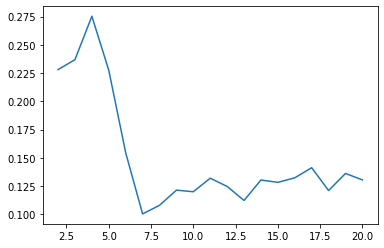

In [197]:
%pylab inline
from matplotlib import pyplot as plt
plt.plot(groups, silhouette_scores)

In [199]:
for idx, score in enumerate(silhouette_scores):
    if score == max(silhouette_scores):
        print(groups[idx])

4


In [200]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20171214news.xlsx', index_col = 0)

In [202]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
titles = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec.get('content'))))
    titles.append(rec.get('title'))

In [203]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [204]:
X

<899x28964 sparse matrix of type '<class 'numpy.longlong'>'
	with 122308 stored elements in Compressed Sparse Row format>

In [205]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [206]:
cs.shape

(899, 899)

In [208]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

groups = []
silhouette_scores = []
for k in range(2,21):
    km = KMeans(n_clusters = k, init='k-means++', random_state=42)
    c = km.fit_predict(cs)
    groups.append(k)
    silhouette_scores.append(silhouette_score(cs, labels=c))


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


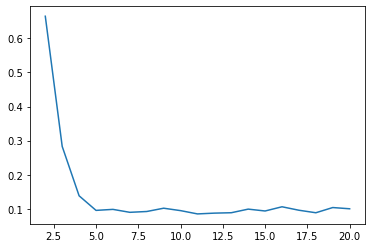

In [209]:
%pylab inline
from matplotlib import pyplot as plt
plt.plot(groups, silhouette_scores)

## 圖論

In [211]:
import networkx
G = networkx.Graph()

In [212]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)

In [217]:
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(4,5)

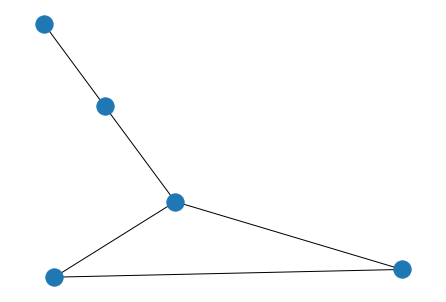

In [218]:
networkx.draw(G)

In [220]:
X = networkx.adj_matrix(G)

In [221]:
X.toarray()

array([[0, 1, 1, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=int64)

## 使用Louvain 做文章分群

In [222]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20171214news.xlsx', index_col = 0)

In [223]:
import jieba
jieba.load_userdict('userdict.txt')
corpus = []
titles = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec.get('content'))))
    titles.append(rec.get('title'))

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [226]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [230]:
cutoff = 0.5
m = (cs < 0.5).astype(int)

In [232]:
import networkx
G = networkx.from_numpy_matrix(m)

In [234]:
#networkx.draw(G)
networkx.write_graphml(G, '/Users/davidchiu/Desktop/article.graphml')

In [235]:
! pip install python-louvain

In [238]:
import community
comm = community.best_partition(G)
#comm


In [239]:
cluster_ary = np.array(list(comm.values()) )

In [241]:
#cluster_ary

In [248]:
from collections import Counter
c = Counter(cluster_ary)
c.most_common(10)

[(3, 30),
 (70, 20),
 (114, 8),
 (141, 8),
 (142, 5),
 (153, 5),
 (124, 4),
 (195, 4),
 (334, 4),
 (599, 4)]

In [242]:
np_titles = numpy.array(titles)

In [252]:
np_titles[cluster_ary == 141].tolist()

['【美夢一場】美台軍艦互訪皆是空？\u3000卜睿哲：川普不會執行',
 '美國會授權軍艦來台\u3000蒲博思：總統職權不需國會指揮',
 '美台軍艦互訪寫入國會意見\u3000前高官：川普不會執行',
 '川普簽NDAA評估美台軍艦互停\u3000立委憂台灣成籌碼',
 '美台軍艦互訪？\u3000陸國台辦：挾洋自重不可能得逞',
 '美國務卿首度未提《台灣關係法》\u3000外交部：對台政策不變',
 '川普簽署國防授權法\u3000美艦停台列國會意見',
 '【誰怕誰】中國嗆武統台灣\u3000美議員：美台應聯合軍演']

In [256]:
from collections import Counter
c = Counter(cluster_ary)
for group, cnt in c.most_common(10):
    articles = np_titles[cluster_ary == group]
    print('第{}群 - 共{}篇文章'.format(group, cnt))
    print(articles.tolist()[0])
    print('==========================')


第3群 - 共30篇文章
【特企】NGO聯名譴責中共迫害宗教信仰
第70群 - 共20篇文章
【狗仔偷拍】小嫻搬離何守正家租66坪房　月租6萬元
第114群 - 共8篇文章
驚！　野生捕獲恐龍遛汪星人
第141群 - 共8篇文章
【美夢一場】美台軍艦互訪皆是空？　卜睿哲：川普不會執行
第142群 - 共5篇文章
【咩姊台語】做直銷開公司建人脈　張誌家與前妻吸千萬捲款
第153群 - 共5篇文章
【搏感情動畫】台電每年30億敦親睦鄰費　協助立委選民服務
第124群 - 共4篇文章
打臉提勒森　白宮：現在不是與北韓談判的時機
第195群 - 共4篇文章
 回應北檢聲明　徐巧芯 ：不要事情鬧大了才推給媒體
第334群 - 共4篇文章
【壹週刊】百億貸款將到期　柯P放容積解套京華城
第599群 - 共4篇文章
海嘯哥登Google暴紅運動員冠軍


## 小練習
- 請使用社群偵測法，找出2015年6月28號當天有哪些文章主題，並列舉該主題下的文章，文章數量與前十大主題關鍵字
(https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20150628news.xlsx)